# Datos del alumno

**Nombre**:
Ezequiel

**Apellidos**:
Ortega Palomino


**Grupo:**
A2

Recordamos que el objetivo de este proyecto es predecir si un trabajador va a abandonar la empresa o no (variable `left`).

Objetivos del sprint:

*   Aplicar al menos dos tipos diferentes de métodos de ensembles (uno de Bagging y otro de Boosting). Y probar dos configuraciones diferentes de hiperparámetros para cada uno.

*   Comparar y discutir los resultados, identificando el mejor ensemble en cuanto a poder predictivo.

*   Obtención de la importancia de las variables para el mejor método.

Para este caso continuaremos con los datos empleados en secciones anteriores.

Lo primero de todo será importar las librerías necesarias.

In [57]:
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             roc_auc_score,
                             roc_curve,
                             confusion_matrix,
                             classification_report)
from sklearn.model_selection import (cross_val_score,
                                     GridSearchCV,
                                     RandomizedSearchCV,
                                     learning_curve,
                                     validation_curve,
                                     train_test_split)
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from warnings import filterwarnings

%matplotlib inline

Y las específicas para este sprint.

In [58]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

Cargamos las matrices de train y test que hemos calculado en el sprint 1.

In [ ]:
##Descarga manual: https://drive.google.com/file/d/1S7DtU2HEFXkqyJp_RcILNSgEsY3huIL9/view?usp=sharing
##Descarga manual: https://drive.google.com/file/d/1O1BRGwSd81TOOpaQvoo5BHDsrPEruz93/view?usp=sharing
##Descarga manual: https://drive.google.com/file/d/1u3yI5L_2YI77uF_WT9ysIzw8dydVlQSh/view?usp=sharing
##Descarga manual: https://drive.google.com/file/d/1eWo_m2gbihSuUQeOhH8I8Q0uudluQKBT/view?usp=sharing


#Descargamos los ficheros de Google Drive (si lo ejecutais en un entorno diferente a Google Colab, tenéis que intalar previamente wget en vuestro PC)
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1S7DtU2HEFXkqyJp_RcILNSgEsY3huIL9' -O 'y_train.npy'
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1O1BRGwSd81TOOpaQvoo5BHDsrPEruz93' -O 'y_test.npy'
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1u3yI5L_2YI77uF_WT9ysIzw8dydVlQSh' -O 'X_train.npy'
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1eWo_m2gbihSuUQeOhH8I8Q0uudluQKBT' -O 'X_test.npy'

Verificamos que las dimensiones se corresponden con la partición de 80% de los datos para el conjunto de train y 20% de los datos para test.

In [60]:
X_train, X_test,y_train,y_test = np.load("X_train.npy"),np.load("X_test.npy"),np.load("y_train.npy"),np.load("y_test.npy")

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11999, 17)
(3000, 17)
(11999,)
(3000,)


# CUESTION 1 - Modelo de tipo Bagging

## Combinación de hiperparámetros 1

In [61]:
#Cargamos las librerías
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [62]:
#Sacamos el árbol de decisión
base_classifier = DecisionTreeClassifier()

In [63]:
bagging_classifier = BaggingClassifier(base_estimator=base_classifier)

In [64]:
#Ajustamos la malla que le vamos a pasar a la función GridSearchCV
param_grid_bagging = {
    'n_estimators': [10, 20, 30],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
}

In [65]:
#Ejecutamos el GridSearchCV y lo ajustamos a los datos de entrenamiento
grid_search_bagging = GridSearchCV(bagging_classifier, param_grid_bagging, cv=5, scoring='accuracy')


In [ ]:
#Sacamos el Bagging Regressor del árbol de decisión
grid_search_bagging.fit(X_train, y_train)


In [67]:
# Obtenemos los mejores parámetros
best_params = grid_search_bagging.best_params_
print(f"Mejores hiperparámetros: {best_params}")

Mejores hiperparámetros: {'max_features': 0.7, 'max_samples': 1.0, 'n_estimators': 30}


In [68]:
# Obtenemos el mejor modelo
best_model = grid_search_bagging.best_estimator_

In [69]:
# Hacemos predicciones
y_pred = best_model.predict(X_test)

In [70]:
# Descargamos las librerías de las métricas que vamos a utilizar
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
# Calculamos la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión: {accuracy}")

# Calcular el F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1}")

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Matriz de Confusión:\n{conf_matrix}")

Precisión: 0.991
F1-Score: 0.9909669447996902
Matriz de Confusión:
[[2280    6]
 [  21  693]]


## Combinación de hiperparámetros 2

In [71]:
#Entrenaremos otro modelo similar pero sin aplicar GridSearchCV, elegiremos parámetros al azar.
base_classifier = DecisionTreeClassifier(random_state=42)
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)

In [72]:
# Ajustamos el modelo
bagging_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  random_state=42)

In [73]:
# Hacemos las predicciones
y_pred = bagging_classifier.predict(X_test)

In [74]:
# Calculamos el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Bagging con árbol de decisión: {accuracy}")

Precisión del modelo Bagging con árbol de decisión: 0.9896666666666667


In [75]:
# Validamos con f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1}")

F1-Score: 0.9896491134833793


# CUESTION 2 - Modelo de tipo Boosting

## Combinación de hiperparámetros 1

In [76]:
#Importamos las librerías para ejecutar GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [77]:
#Sacamos el GradientBoostingClassifier
gradient_boosting_classifier = GradientBoostingClassifier(random_state=42)

In [78]:
#Ajustamos la malla que le vamos a pasar al GridSearchCV
param_grid_boosting = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [79]:
#Ajustamos el GridSearchCV
grid_search_boosting = GridSearchCV(gradient_boosting_classifier, param_grid_boosting, cv=5, scoring='accuracy')

In [80]:
# Instanciamos el modelo con los hiperparámetros más adecuados
grid_search_boosting.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [81]:
# Obtenemos los mejores parámetros
best_params = grid_search_boosting.best_params_
print(f"Mejores hiperparámetros: {best_params}")

Mejores hiperparámetros: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}


In [82]:
# Obtenemos los mejores estimadores
best_model = grid_search_boosting.best_estimator_

In [83]:
# Hacemos las predicciones
y_pred = best_model.predict(X_test)


In [84]:
#Validamos con algunas métricas de clasificación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Calculamos la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión: {accuracy}")
# Calculamos el F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1}")
# Obtenemos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Matriz de Confusión:\n{conf_matrix}")

Precisión: 0.9883333333333333
F1-Score: 0.9883583621916688
Matriz de Confusión:
[[2264   22]
 [  13  701]]


## Combinación de hiperparámetros 2

Ahora vamos a modelar combinando los hiperparámetros, es decir, no vamos a utilizar GridSearchCV.

In [85]:
# Definimos el clasificador Gradient Boosting
gradient_boosting_classifier = GradientBoostingClassifier(
    n_estimators=100,  # Número de árboles a construir
    learning_rate=0.1,  # Tasa de aprendizaje
    max_depth=3,  # Profundidad máxima de los árboles
    random_state=42
)

# Entrenamos el modelo
gradient_boosting_classifier.fit(X_train, y_train)

# Realizamos las predicciones
y_pred = gradient_boosting_classifier.predict(X_test)

# Calculamos la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión: {accuracy}")

# Calculamos el F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1}")

# Obtenemos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Matriz de Confusión:\n{conf_matrix}")

Precisión: 0.9753333333333334
F1-Score: 0.9751743529252623
Matriz de Confusión:
[[2262   24]
 [  50  664]]


# CUESTION 3 - ¿Qué modelo tiene mayor poder predictivo?

Comparar los diferentes árboles entrenados empleando las métricas más adecuadas para un problema desblanaceado como el nuestro.

Para la primera cuestión hemos utilizado un Decision Tree Classifier con un Bagging Classifier eligiendo los parámetros con un GridSearhCV y luego comparándolo con el mismo modelo pero con parámetros al azar para comprobar que realmente obtuvimos los mejores en el modelo anterior. Lo mismo hicimos en la segunda cuestión pero con un GradientBoosting Classifier.
Hemos obtenido mejores resultados con el modelo tipo bagging que con el tipo boosting, aunque ambos tienen resultados muy parecidos.

# CUESTION 4 - Importancia de las variables para el modelo

Evaluar las variables más importantes para el mejor modelo elegido. ¿Tiene sentido usar estas variables para evaluar si un empleado va a abandonar la empresa?

In [86]:
#Vamos a sacar y ajustar los datos con los que hemos estado trabajando para evaluar las variables.
datos = pd.read_csv("Rotacion_empleados.csv")
datos.rename(columns={'sales': 'department'}, inplace=True)
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X = [['low'], ['medium'], ['high']]
enc.fit(X)
datos['salary_encoded'] = enc.transform(datos[['salary']])
datos = datos.drop("salary", axis = 1)
datos_dummies = pd.get_dummies(datos, columns=['department'], prefix=['department'])
datos_dummies

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_encoded,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1.0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2.0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2.0,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1.0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1.0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1.0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,1.0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,1.0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,1.0,0,0,0,0,0,0,0,0,1,0


In [87]:
datos_dummies.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary_encoded', 'department_IT',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical'],
      dtype='object')

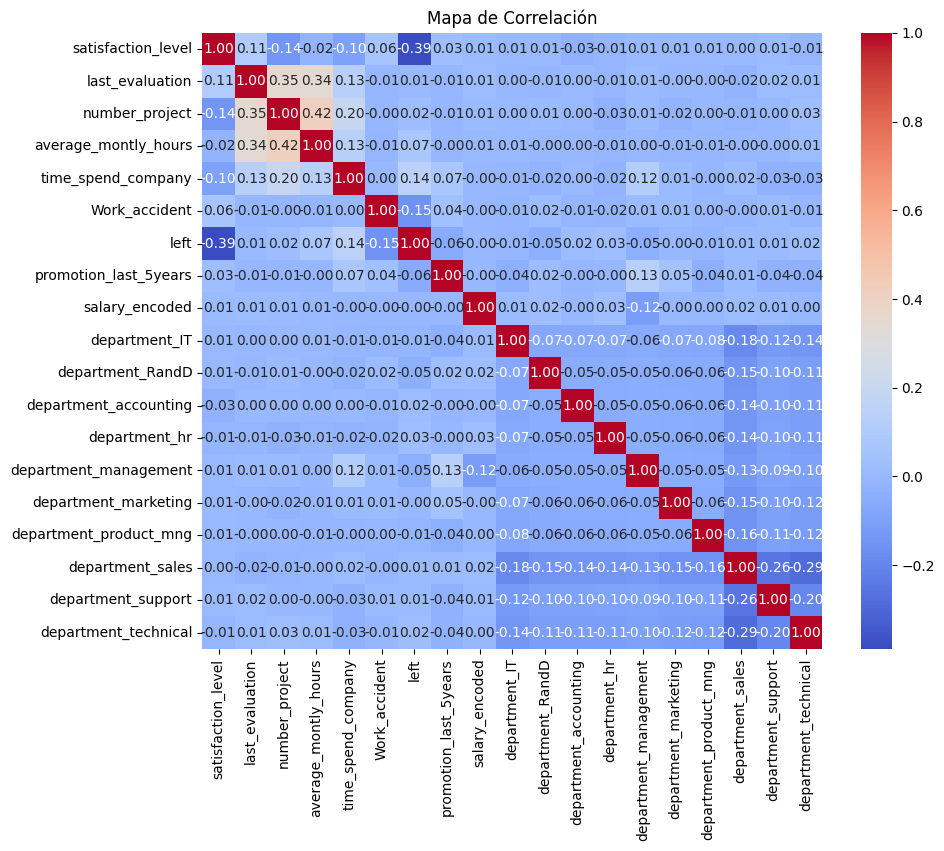

In [88]:
#Vamos a sacar un mapa de correlación de las variables
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = datos_dummies.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correlación")
plt.show()

Evaluando el mapa de correlación, si que podemos prescindir de bastantes variables a la hora de hacer un modelo. Observamos que un gran número de ellos tienen una correlación nula con nuestra variable objetivo "left". Yo diría que la mayoría no se relacionan con ella. Las más importantes son, time_spend_company y work_accident.

*NOTA*: las matrices de train y test que hemos cargado al inicio del sprint no contienen información de los nombres de cada atributo. Esto se puede solventar cargando de nuevo los datos con los que comenzábamos el sprint 1.

Recordad que en el sprint 1 para obtener las matrices de train y test, previamente realizamos unas transformaciones de los datos. Recordamos los pasos:



*   Renombrar la variable `sales` a `department`.
*   Recodificar la variable `salary` con el siguiente criterio para conservar el sentido de orden que contiene la variable: low=0, medium=1, high=2.
*   Transformar la otra variable de tipo *object* (`department`) a numérica codificando sus categorías como variables dummies.


Por lo tanto, a continuación os dejo un enlace para descargar el fichero original al que, para poder usarlo en este sprint, tendréis que hacer previamente las transformaciones descritas previamente.

In [ ]:
#Descarga manual: https://drive.google.com/file/d/1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK/view?usp=sharing
#Descargamos los ficheros de Google Drive
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK' -O 'Rotacion_empleados.csv'

Si no conseguís descargar el fichero con el anterior comando, también lo tenéis a vuestra disposición en los **Recursos del proyecto** con el nombre `Rotacion_empleados.csv`.

**Para el proyecto final vamos a dar un paso más allá, nos piden quedarnos solo con las variables más importantes y luego buscar los mejores hiperparámetros con GridSearchCV o RandomizedSearchCV para comparar con los anteriores realizados. Vamos a ello!!!**

Las variables con más correlación son 'time_spend_company', 'Work_accident' y 'satisfaction_level'. Vamos a modelar con el que mejor resultado hemos obtenido, es decir, Decision Tree Classifier de tipo bagging con Grid Search CV como pide el proyecto y validado por diferentes métricas.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Seleccionamos las variables relevantes
X_train_selected = X_train[:, [4, 5, 6]]
X_test_selected = X_test[:, [4, 5, 6]]

# Definimos el clasificador base (árbol de decisión)
base_classifier = DecisionTreeClassifier(random_state=42)

# Definimos el BaggingClassifier
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, random_state=42)

# Definimos los parámetros a sintonizar
param_grid_bagging = {
    'n_estimators': [10, 20, 30],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
}

# Creamos el objeto GridSearchCV
grid_search_bagging = GridSearchCV(bagging_classifier, param_grid_bagging, cv=5, scoring='accuracy')

# Entrenamos el modelo
grid_search_bagging.fit(X_train_selected, y_train)

# Obtenemos los mejores hiperparámetros
best_params = grid_search_bagging.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Obtenemos el mejor modelo
best_model = grid_search_bagging.best_estimator_

# Realizamos predicciones
y_pred = best_model.predict(X_test_selected)

# Calculamos la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión: {accuracy}")

# Calculamos el F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1}")

# Obtenemos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Matriz de Confusión:\n{conf_matrix}")

Mejores hiperparámetros: {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 10}

Precisión: 0.7816666666666666

F1-Score: 0.73991588990365

Matriz de Confusión:

[[2188   98]

 [ 557  157]]

Conclusión:
Elegir las variables que considero más correladas no me proporcionan mejores resultados en mi modelo y es que, elegir variables con alta correlación no siempre garantiza un modelo más preciso. La correlación entre variables no implica necesariamente una relación causal y no siempre indica la importancia de una variable en un modelo predictivo.
 Algunas razones por las que podrías estar observando una disminución en la precisión al elegir variables con alta correlación son:
 1. Multicolinealidad: Si dos variables están altamente correlacionadas entre sí, pueden estar proporcionando información redundante al modelo. Esto puede conducir a una disminución en el rendimiento del modelo.
 2. Ruido en los Datos: La alta correlación no garantiza que una variable sea verdaderamente importante para el modelo. Podría haber ruido en los datos o factores no considerados que afecten la relación entre las variables.
 3. No linealidad: Incluso si dos variables están altamente correlacionadas, la relación entre ellas podría ser no lineal. En este caso, un modelo que solo tiene en cuenta la correlación lineal podría no funcionar tan bien.
 4. Elección Incorrecta de Variables: Es posible que otras variables que no están altamente correlacionadas sean realmente más importantes para predecir la variable objetivo. La correlación no es la única medida de importancia de una variable.
 5. Sobreajuste de Modelos Anteriores: Si comparamos el rendimiento de un modelo con todas las variables con un modelo con solo las variables altamente correlacionadas, es posible que el primer modelo esté sobreajustado y el segundo esté menos sesgado.

PD: No he conseguido, después de muchos intentos, aplicar el feature_importance, de ahí mi alternativa utilizando otro método como las correlaciones, aunque seguramente mis conclusiones al obtenerlas de ahí no sean las más adecuadas.